### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 9
### Due: Saturday, Apr 13th at 11.59pm CDT
---

The first homework problem this week is very subjective, and necessarily deal with some randomization in your solutions. Do your best to fully catalog your tests, checks, and thought process as you answer. 

## Problem 1


Go to the TensorFlow playground [here](https://playground.tensorflow.org/#activation=linear&regularization=L2&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=35&networkShape=1&seed=0.50246&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false). You will play with the tensorflow neural network architecture there, and come back to answer the questions here.


1. The model as given combines two input features into a single neuron with a linear activation of form $f(x) = x$. Write down an equation that algebraically describes the output of this network, in terms of the synapse weights, the neuron bias, and the input data. Based on your equation, will this model learn any nonlinearities? Run the network to confirm your guess.


2. Try increasing the number of neurons in the hidden layer from 1 to 2, and also try changing from a Linear activation to a nonlinear activation like ReLU. Can you create a model that can learn nonlinearities? Can it model the data effectively? Check through multiple re-runs. *Note that you can hover over the neurons to see which features they are identifying.*


3. Try increasing the number of neurons in the hidden layer from 2 to 3, using a nonlinear activation like ReLU. Can it model the data effectively? How does model quality vary from run to run?


4. Continue experimenting by adding or removing hidden layers and neurons per layer. Also feel free to change learning rates, regularization, and other learning settings. What is the smallest number of neurons and layers you can use that gives test loss of 0.177 or lower?


5. Does increasing the model size improve the fit, or how quickly it converges? Does this change how often it converges to a good model? For example, try the following architecture:

- First hidden layer with 3 neurons.
- Second hidden layer with 3 neurons.
- Third hidden layer with 2 neurons.

#### Part 1

<font color='lime'> 

For a system of two inputs ($x_1, x_2$) each will have a corresponding weight ($w_1, w_2$) that is fed into the one neuron. Given that the activation function has form $f(z) = z$, these inputs are modified as $z = \sum wx + b_n$, where $b_n$ is the bias of the neuron. These are then fed into the output, which has its own weight ($w_o$) and bias ($b_o$). This gives us the following equation for the output ($O$):

$$ O = w_{o}z+b_{o} =  w_{o}(w_1x_1 + w_2x_2 + b_{n})+b_{o} $$


Based on this equation, we can conclude that the model will not learn any nonlinearities because there is no nonlinear combination of our inputs ($x_1x_2$) in this equation.

Indeed, running this network gives a linear line as a cutoff between the two classifications.
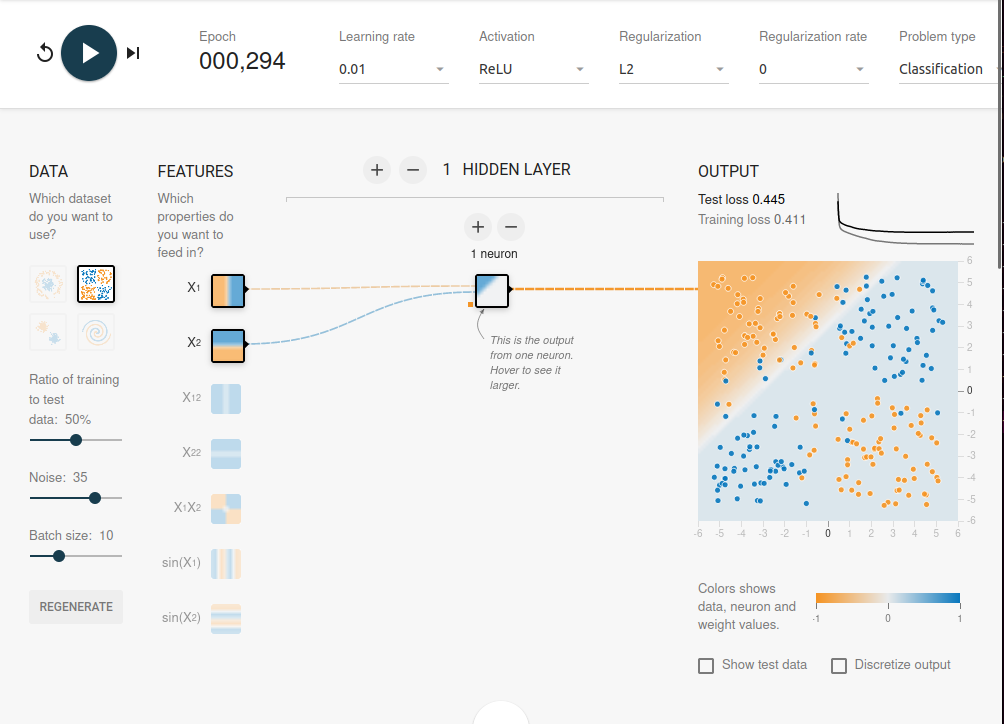

#### Part 2

<font color='lime'> Yes, some "Nonlinearities" are visible in that the regions identified in the classification are not bound by just one straight line, but multiple lines.

It doesn't model the data well, as it only captures at most two of the square regions, and is unable to fully resolve the checkerboard shape. Losses sit at around ~0.350 for most runs.

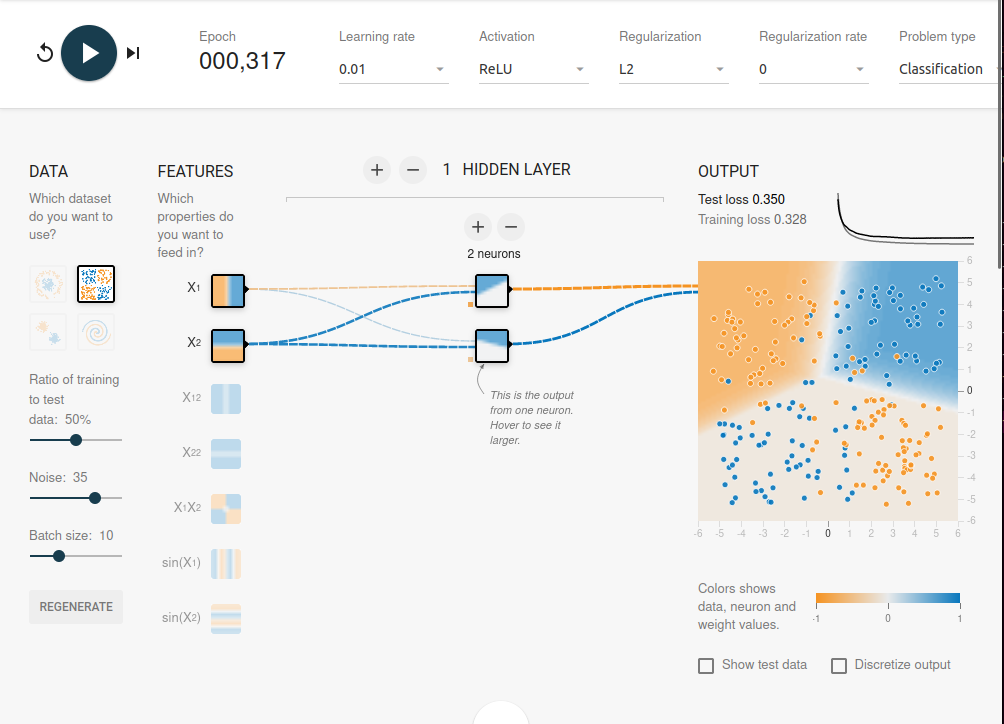
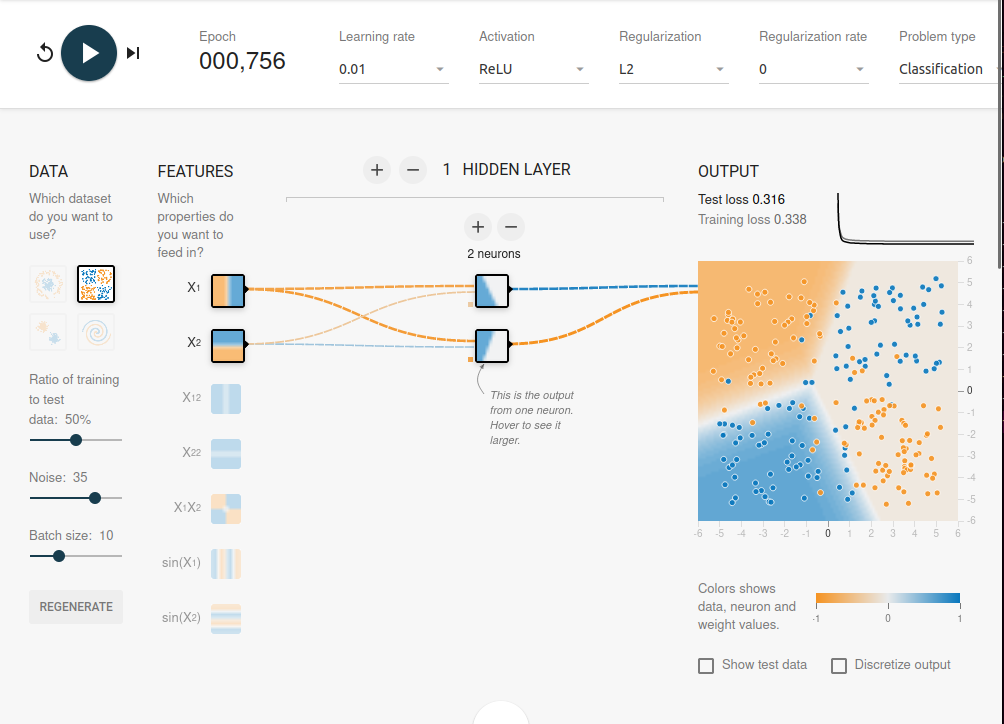

#### Part 3

<font color='lime'> Using ReLU with 3 neurons in the hidden layer is a marked improvement over the 2 neuron case, with test losses reliably able to reach values of ~0.150. The fitting to the data is also more consistent than 2 or 1 neurons, generating the same shape of a pinched linear hourglass laying diagonal along the checkerboard. However, it is not perfect, and sometimes is led astray (see second image).

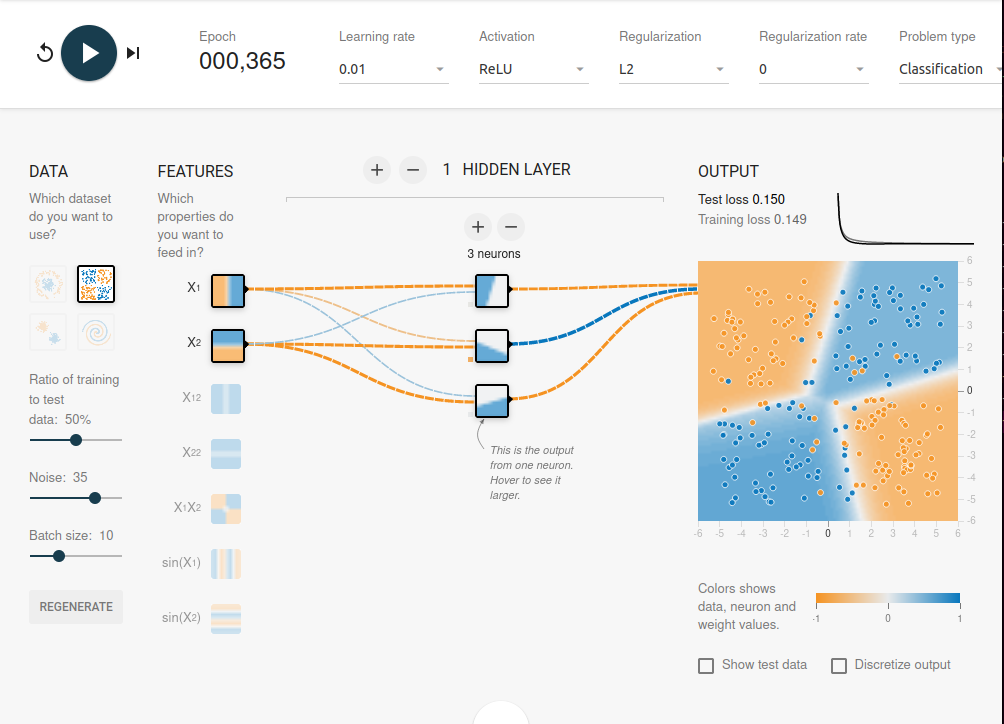
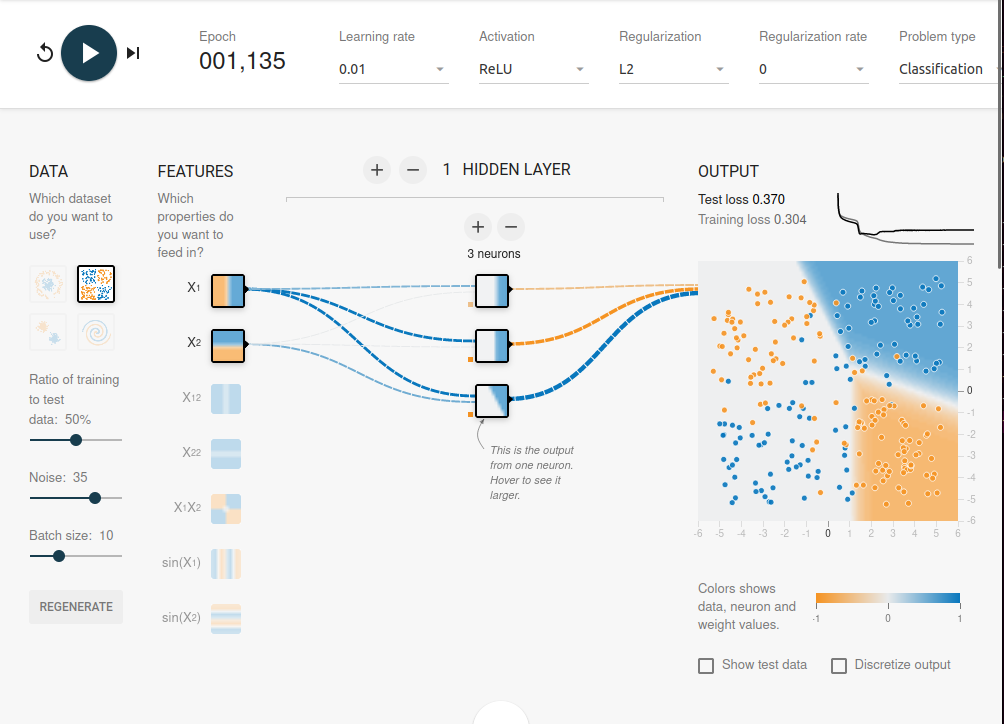
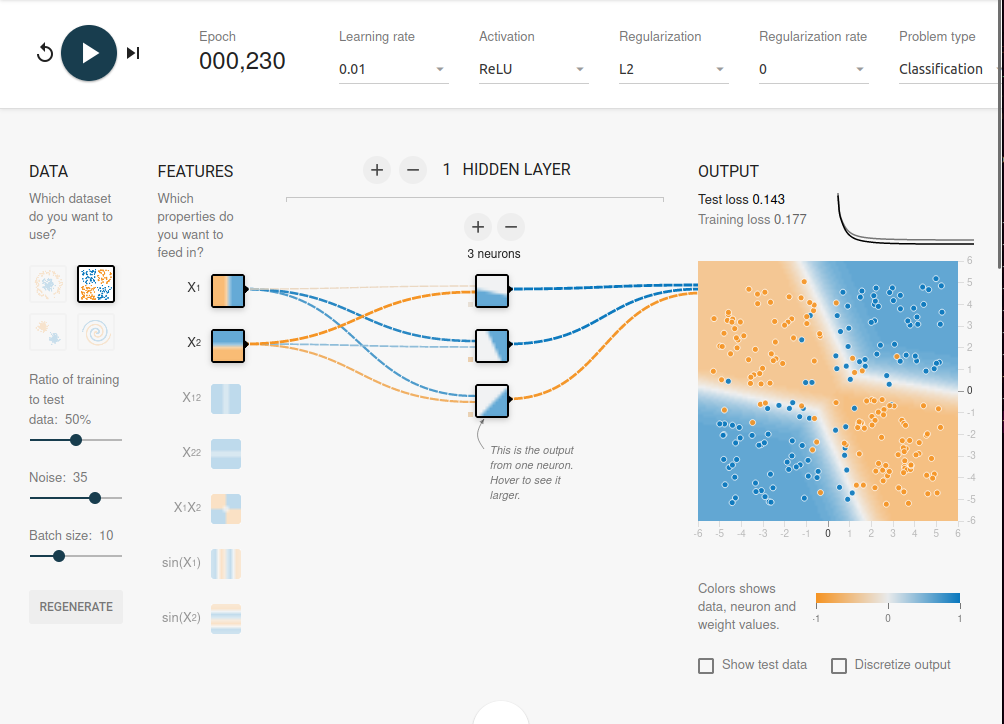

#### Part 4

<font color='lime'> Given the above, 3 neurons appears to be the lowest at which the test loss can drop below 0.177. 4 neurons seems to reliably get below that threshold without changing any of the other parameters. 

Messing with the other parameters, increasing the ratio of training to test data was able to further reduce the test loss down to just 0.114

4 neurons:

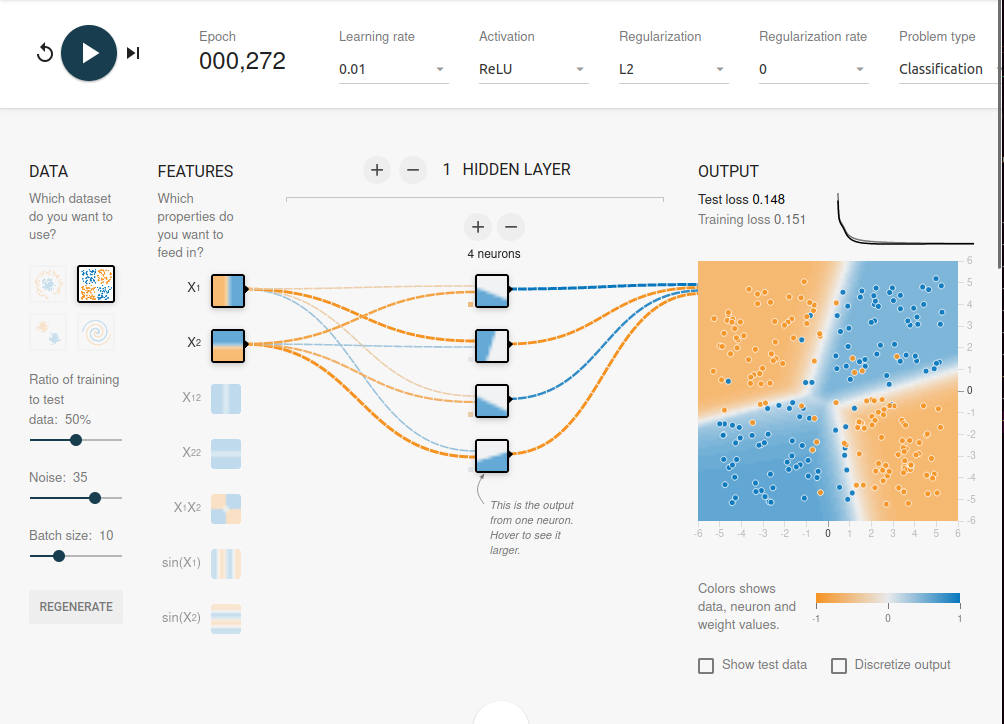

3 neurons + 90% train-test ratio:

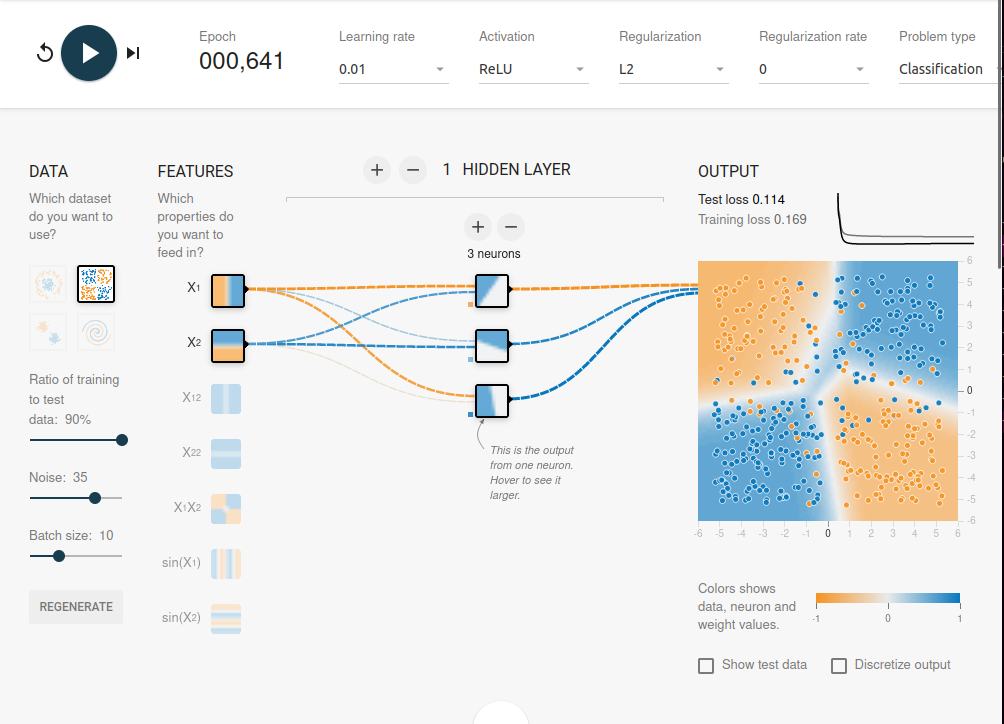

#### Part 5

Does increasing the model size improve the fit, or how quickly it converges? Does this change how often it converges to a good model? For example, try the following architecture:

- First hidden layer with 3 neurons.
- Second hidden layer with 3 neurons.
- Third hidden layer with 2 neurons.

<font color='lime'>

Increasing the model size doesn't always improve the fit, but when it does it has a much higher minimization of test loss than the smaller models. Most runs were also able to find a better fit, even if they were originally led astray (see images 5 and 6). It seems slower to converge, evidenced in the shallower slopes of decreasing test loss in the early epochs.

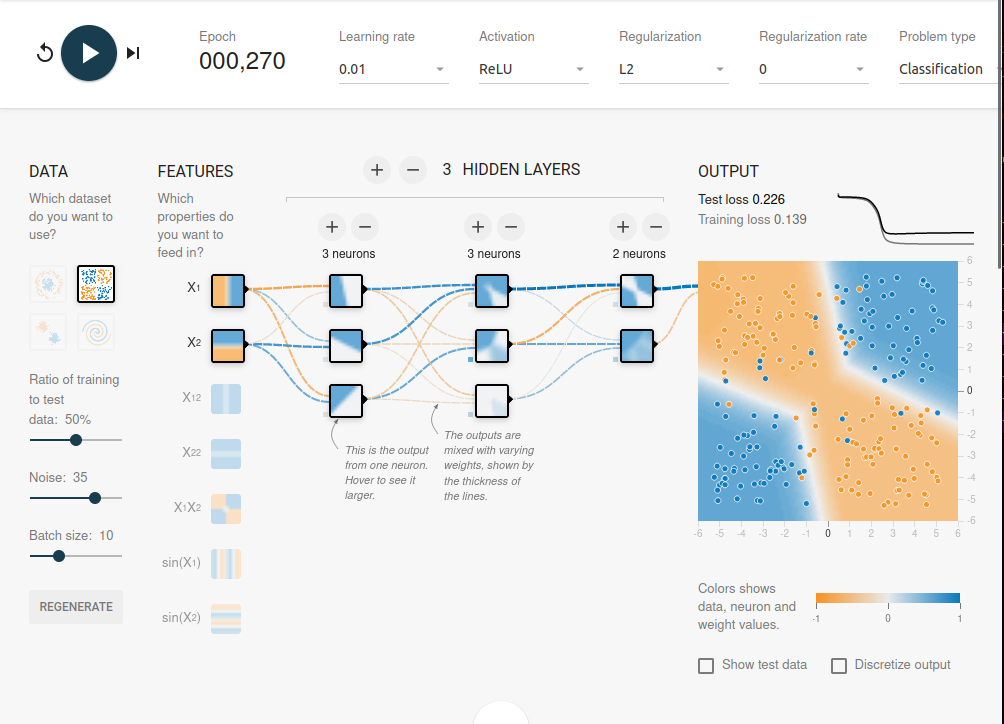
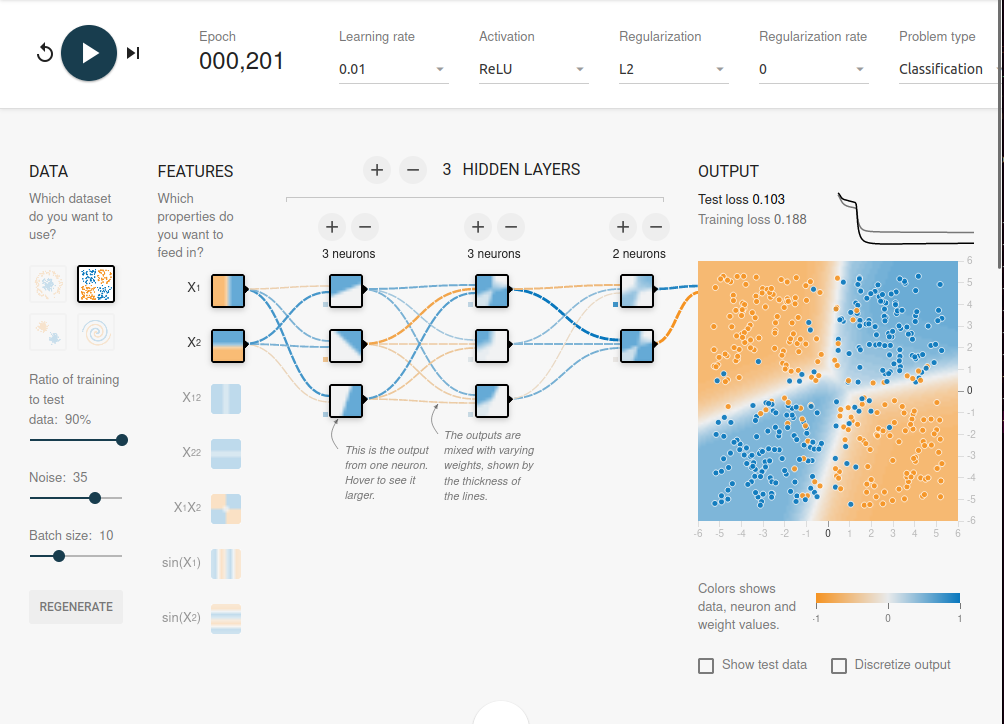
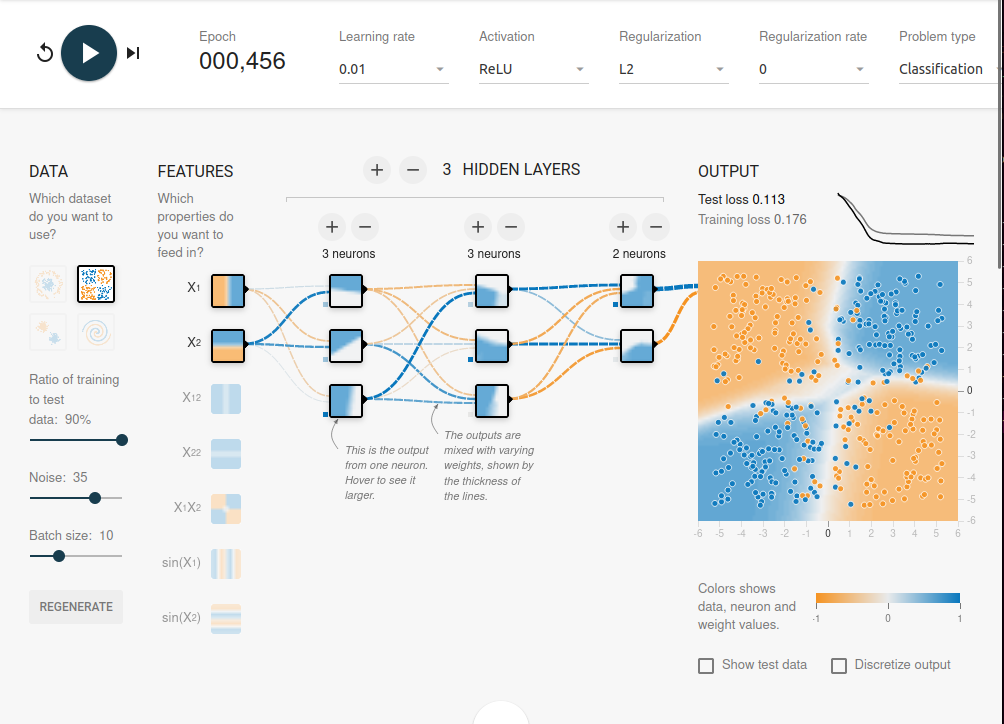
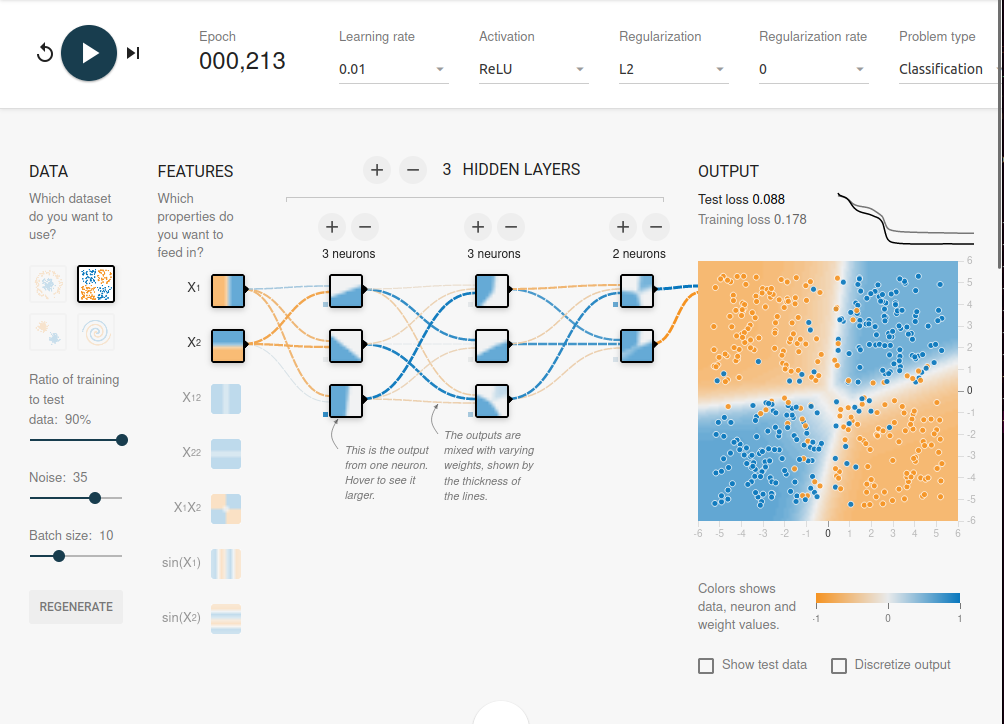

Here, we see a fit led astray (first) before finding a better fit (second):

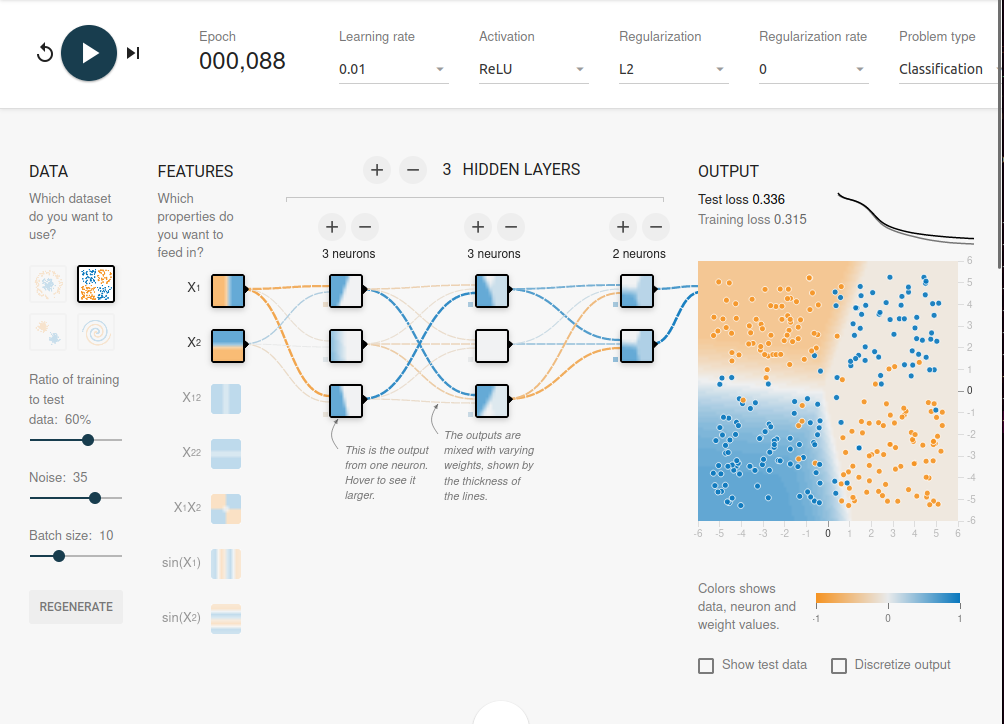
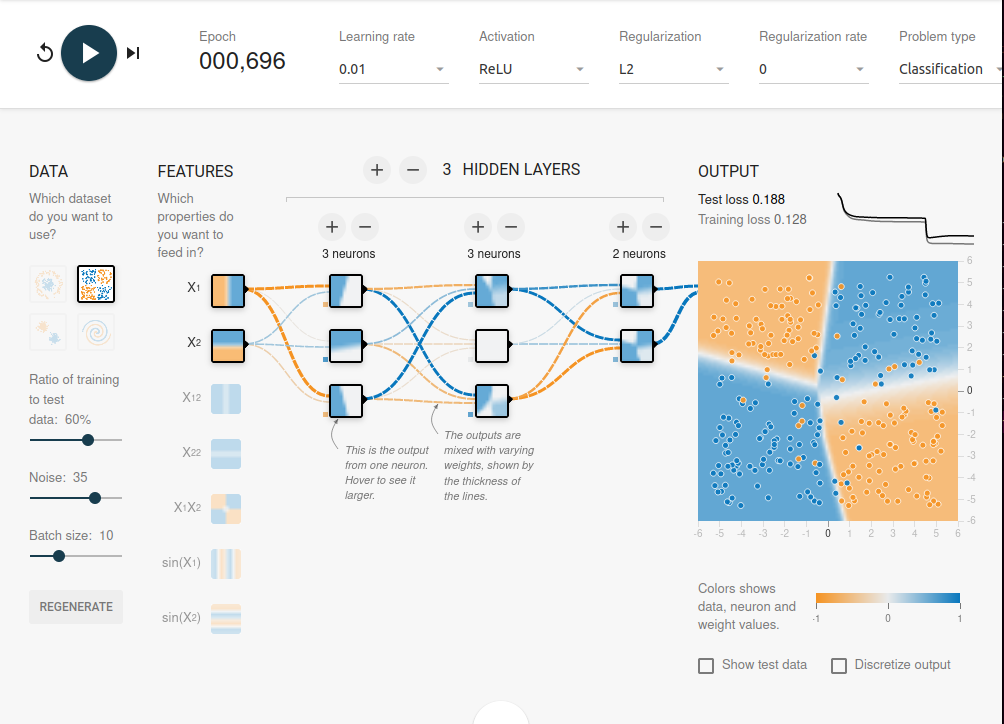

This kind of course-correction was not evidenced in the smaller models.

## Problem 2

The first few steps of this problem are the same as last week's homework.


1. Read in the same galaxy color data as used in Homework 8. Slice the data array to only take every other 10th row. From this reduced data volume, create arrays of $(u-g)$, $(g-r)$, $(r-i)$, and $(i-z)$ colors. Also create arrays of redshift and the spectral class. 


2. We're going to make classification pretty tough for our deep neural network. Make a scatter plot of $(r-i)$ versus $(i-z)$, color coding by galaxy or quasar class. Notice how much more difficult the visual discrimination is compared to $(u-g)$ versus $(g-r)$. The plot should include appropriate axis labels and a legend.


3. Stack the $(r-i)$ and $(i-z)$ colors into a data matrix, $X$. Create a target label array that has $0$ for a regular galaxy and $1$ for a quasar. Perform a train-test split, taking $20\%$ of the data for testing. Set the `random_state` in your train-test split to be `42` for reproducibility (and easy comparison with my solutions).


4. Scale your training and testing data to prepare it for the DNN. 


5. Train scikit-learn's multi-layer perceptron classifier with ReLU activation, stochastic gradient descent, two hidden layers of respective sizes of $5$ and $2$, and using `max_iter=1000`, and `random_state=42`. As with classifiers in last week's homework, plot an ROC curve that shows the network's performance on the scaled testing data. 


6. Now let's optimize the hyperparameters of your network. You will use `GridSearchCV` with the following hyperparameters for the network:

```
parameters = {'solver': ['lbfgs', 'sgd', 'adam'], 
              'hidden_layer_sizes': [(2,2), (5,5), (5,2), (5,5,5)], 
              'activation': ['relu', 'tanh'], 
              'random_state': [42], 'max_iter': [1000]}
```

Remember that you can utilize all availables cores on your machine with `n_jobs=-1`. Print out the classification score for the training data, and the best parameters obtained by the cross validation.


7. Fit a new DNN using the best hyperparameters obtained in (6), and make a plot that has ROC curves for this new network and your original network. Let the x and y axes have the full limit range of 0 to 1. Voila!

#### Part 1

In [2]:
#importing tools
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#loading in data
data = np.load('/home/nowickr/astr_8070_s24/coursework/homeworks/hw_data/hw8_data_1.npy')

#printing names of columns
data.dtype.names

('u', 'g', 'r', 'i', 'z', 'specClass', 'redshift', 'redshift_err')

In [7]:
#slicing to only take every 10th item
dataslice = data[::10]

#creating color columns from sliced data
ug = dataslice['u'] - dataslice['g']
gr = dataslice['g'] - dataslice['r']
ri = dataslice['r'] - dataslice['i']
iz = dataslice['i'] - dataslice['z']

redshift = dataslice['redshift']
specClass = dataslice['specClass']

#### Part 2

In [8]:
#getting indicies of galaxies and quasars
gal_index = np.where(specClass==['GALAXY'])
qsar_index = np.where(specClass==['QSO'])

#setting up new arrays for galaxies and quasars
galaxies = specClass[gal_index]
quasars = specClass[qsar_index]

print('Number of Galaxies:', len(galaxies))
print('Number of Quasars:', len(quasars))

Number of Galaxies: 4264
Number of Quasars: 736


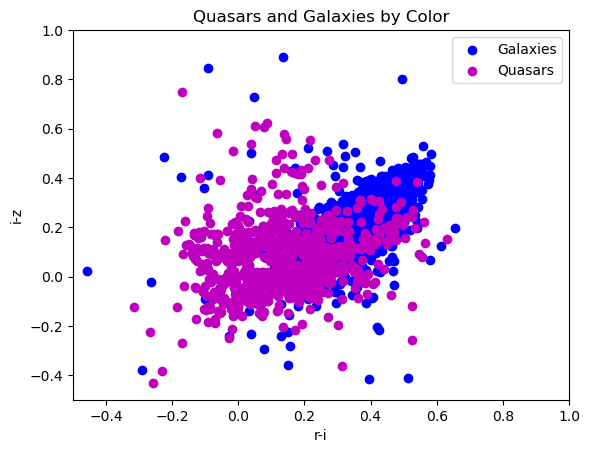

In [15]:
#scatterplot
plt.scatter(ri[gal_index], iz[gal_index], color='b', label='Galaxies') #plotting galaxies
plt.scatter(ri[qsar_index], iz[qsar_index], color='m', label='Quasars') #plotting quasars
plt.ylabel('i-z')
plt.xlabel('r-i')
plt.title('Quasars and Galaxies by Color')
plt.xlim(-0.5,1)
plt.ylim(-0.5,1)
plt.legend()

#### Part 3

In [17]:
#stacking data
X = np.vstack((ri,iz)).T
print(X.shape)
print(X)

(5000, 2)
[[0.02815 0.28811]
 [0.38795 0.18884]
 [0.15165 0.21238]
 ...
 [0.42731 0.34859]
 [0.41424 0.31607]
 [0.40895 0.3181 ]]


In [18]:
#creating target label array (0 for gal, 1 for qso)
target_label = np.zeros(5000)
target_label[qsar_index] = 1

print(target_label)

[1. 0. 1. ... 0. 0. 0.]


In [19]:
#performing train-test-split
from sklearn.model_selection import train_test_split

#setting random state
np.random.RandomState(42)

#performing train-test-split
X_train, X_test, target_train, target_test = train_test_split(X, target_label, test_size=0.2)

#### Part 4

In [21]:
#scaling training and testing data to prepare for DNN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(X_train)
Xtest_scaled = scaler.fit_transform(X_test)

#### Part 5

In [22]:
#Train scikit-learn's multi-layer perceptron classifier with ReLU activation, stochastic gradient descent, two hidden layers of respective sizes of $5$ and $2$, 
# and using `max_iter=1000`, and `random_state=42`. As with classifiers in last week's homework, 
#plot an ROC curve that shows the network's performance on the scaled testing data. 

#importing tool
from sklearn.neural_network import MLPClassifier

#defining DNN
mlpc = MLPClassifier(hidden_layer_sizes=(5,2), activation='relu', solver='sgd', max_iter=1000, random_state=42)

In [23]:
#training the model
mlpc.fit(Xtrain_scaled,target_train)

#making predictions with model
mlpc_pred = mlpc.predict_proba(Xtest_scaled)

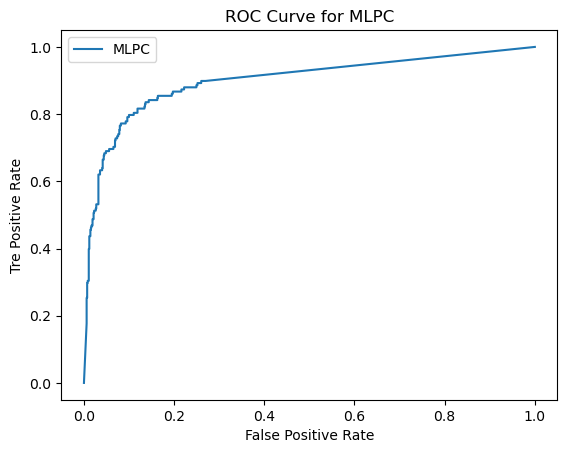

In [28]:
#importing tools
from sklearn.metrics import roc_curve

#making roc curve
fpr, tpr, thresholds = roc_curve(target_test, mlpc_pred[:,1]) #false positive right, true positive right, thresholds
fpr = np.concatenate([[0], fpr])
tpr = np.concatenate([[0], tpr])

plt.plot(fpr, tpr, label='MLPC' )# label=labels[name]) 
plt.xlabel('False Positive Rate')
plt.ylabel('Tre Positive Rate')
plt.title('ROC Curve for MLPC')
plt.legend()

#### Part 6

In [29]:
#importing tool
from sklearn.model_selection import GridSearchCV

#setting parameters for GridSearchCV
parameters = {'solver': ['lbfgs', 'sgd', 'adam'], 
              'hidden_layer_sizes': [(2,2), (5,5), (5,2), (5,5,5)], 
              'activation': ['relu', 'tanh'], 
              'random_state': [42], 'max_iter': [1000]}

In [30]:
#Using GridSearchCV
#establishing "grid" with MLPC fit model
grid = GridSearchCV(mlpc, parameters, n_jobs=-1)
#fit the model with our data features, reshaped to accomodate grid.fit
grid.fit(Xtrain_scaled, target_train)
param_opt = grid.best_params_
score_opt = grid.best_score_

/home/nowickr/miniconda3/envs/astro8070/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/nowickr/miniconda3/envs/astro8070/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/nowickr/miniconda3/envs/astro8070/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: C

In [31]:
#Printing the classification score for the training data, and the best parameters obtained by the cross validation.
print('Classification Score:', score_opt)
print('Cross-Validated Optimal Parameters:', param_opt)

Classification Score: 0.9397500000000001
Cross-Validated Optimal Parameters: {'activation': 'tanh', 'hidden_layer_sizes': (5, 2), 'max_iter': 1000, 'random_state': 42, 'solver': 'adam'}


#### Part 7

In [35]:
#Fit a new DNN using the best hyperparameters obtained in (6), and make a plot that has ROC curves for this new network and your original network. 
#Let the x and y axes have the full limit range of 0 to 1. Voila!

#new model
new_mlpc = MLPClassifier(hidden_layer_sizes=(5,2), activation='tanh', solver='adam', max_iter=1000, random_state=42)

In [36]:
#training the new model
new_mlpc.fit(Xtrain_scaled,target_train)

#making predictions with new model
new_mlpc_pred = new_mlpc.predict_proba(Xtest_scaled)

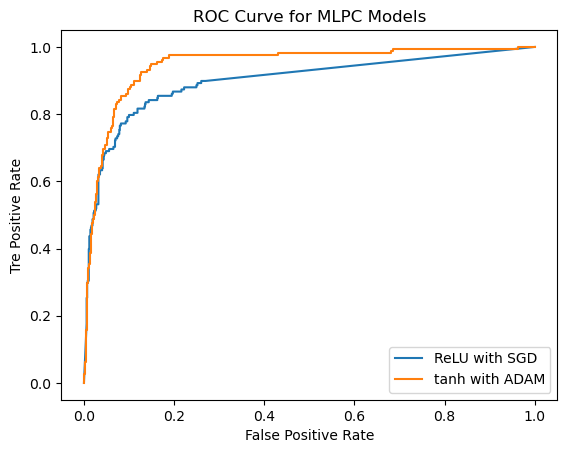

In [37]:
#making roc curve
fpr_n, tpr_n, thresholds_n = roc_curve(target_test, new_mlpc_pred[:,1]) #false positive right, true positive right, thresholds
fpr_n = np.concatenate([[0], fpr_n])
tpr_n = np.concatenate([[0], tpr_n])

plt.plot(fpr, tpr, label='ReLU with SGD')# label=labels[name]) 
plt.plot(fpr_n, tpr_n, label='tanh with ADAM')# label=labels[name]) 
plt.xlabel('False Positive Rate')
plt.ylabel('Tre Positive Rate')
plt.title('ROC Curve for MLPC Models')
plt.legend()

<font color='lime'>
From this plot, it is clear that the Parameters Optimized Using GridSearchCV perform better!